In [1]:
import geopandas as gpd 
import numpy as np 
import os
import matplotlib.pyplot as plt 

In [2]:
labels_path = "/home/rustt/Documents/Projects/S1_S2_classification/sentinel_classification/data/external/polygons"
project_dir = "/home/rustt/Documents/Projects/S1_S2_classification"
out_dir = os.path.join(project_dir, "sentinel_classification/data/processed")

In [3]:
poly = gpd.read_file(os.path.join(labels_path, "ROI_Classif.shp"))

In [4]:
mask = gpd.read_file(os.path.join(labels_path, "mask_classif.shp"))
mask2 = gpd.read_file(os.path.join(labels_path, "mask_classif22N.shp"))

<Axes: >

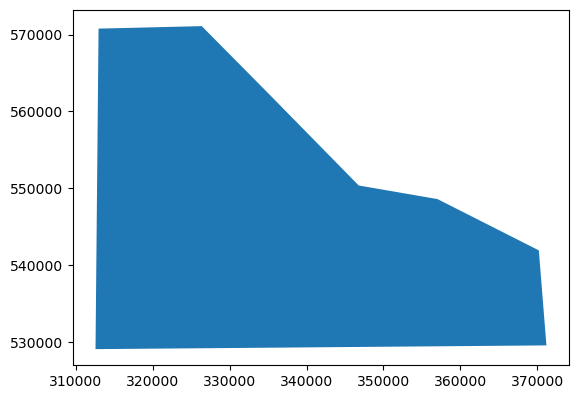

In [5]:
mask2.plot()

Apparemment un mak sur le continent couvert.

In [6]:
poly.classid.value_counts()

12    6
4     5
3     5
5     5
1     4
2     4
6     4
11    3
7     2
Name: classid, dtype: int64

In [7]:
poly.head()

,classid,geometry
0,1,"POLYGON ((324939.882 565077.219, 325442.563 56..."
1,1,"POLYGON ((328817.707 562348.379, 329727.321 56..."
2,1,"POLYGON ((338201.089 554640.602, 338847.393 55..."
3,11,"POLYGON ((340554.368 536493.089, 340818.682 53..."
4,11,"POLYGON ((338773.121 537125.144, 339106.386 53..."


In [61]:
labels = {
    1:"1 - coastal mangrove",
    2:"2 - forest",
    3:"3 - swamps",
    4:"4 - herbaceous savana",
    5:"5 - bare soil",
    6:"6 - water",
    7:"7 - building area",
    11:"11 - low mangrove", 
    12:"12 - high mangrove",
    13: "13 - clouds"
}

In [24]:
poly["classlabel"] = poly.classid.map(labels)

In [25]:
poly.isna().sum()

classid       0
geometry      0
classlabel    0
dtype: int64

In [26]:
poly.classlabel.nunique()

9

In [28]:
poly.to_file(os.path.join(labels_path, "ROI_Classif_2.shp"))

Text(0.5, 1.0, 'distribution surfaces des classes labellisées')

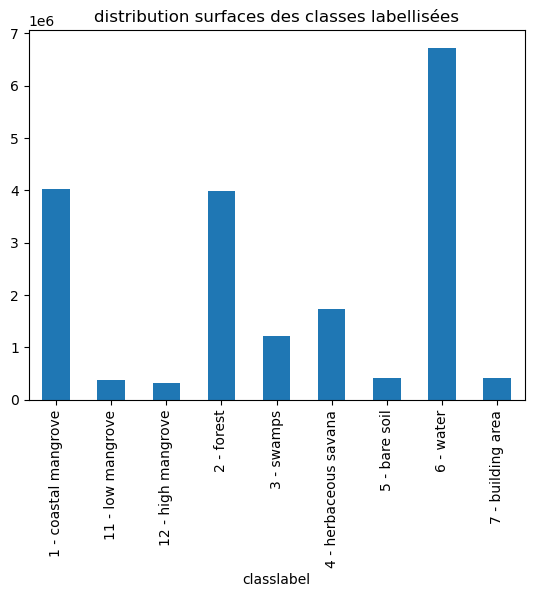

In [35]:
poly.groupby("classlabel").apply(lambda x: x.geometry.area.sum()).plot(kind="bar")
plt.title("distribution surfaces des classes labellisées")

=> transformer en nombre de pixels

#### Labels corrected

In [88]:
labels_path = "/home/rustt/Documents/Projects/S1_S2_classification/sentinel_classification/data/processed/ROI_Classif_corrected.shp"

In [89]:
poly = gpd.read_file(labels_path)

In [90]:
poly.shape

(63, 3)

In [91]:
poly.crs

<Projected CRS: EPSG:32622>
Name: WGS 84 / UTM zone 22N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 54°W and 48°W, northern hemisphere between equator and 84°N, onshore and offshore. Brazil. Canada - Newfoundland. French Guiana. Greenland.
- bounds: (-54.0, 0.0, -48.0, 84.0)
Coordinate Operation:
- name: UTM zone 22N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [92]:
poly["classlabel"] = poly.classid.map(labels)

Text(0.5, 1.0, 'distribution surfaces des classes labellisées')

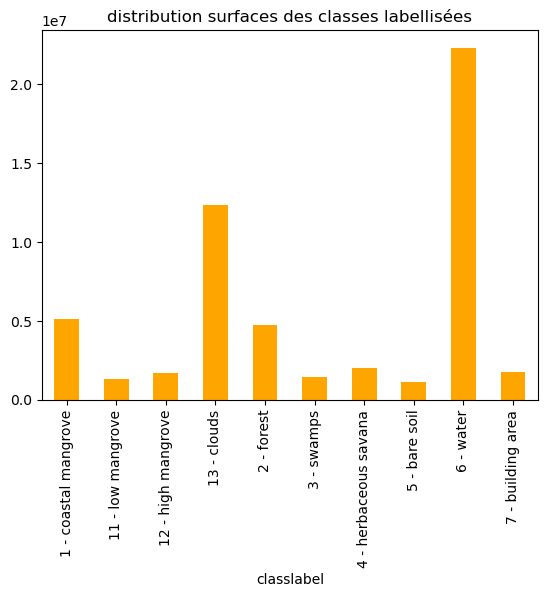

In [93]:
poly.groupby("classlabel").apply(lambda x: x.geometry.area.sum()).plot(kind="bar", color="orange")
plt.title("distribution surfaces des classes labellisées")

In [94]:
area_cls = poly.groupby("classlabel").apply(lambda x: x.geometry.area.sum())

nombre de pixels (environ- faux via interpolation): 

In [95]:
area_cls / (10*10)

classlabel
1 - coastal mangrove      51531.927844
11 - low mangrove         13103.498151
12 - high mangrove        17213.341314
13 - clouds              123412.387414
2 - forest                47749.206521
3 - swamps                14507.144004
4 - herbaceous savana     20467.364443
5 - bare soil             11259.020198
6 - water                223235.233885
7 - building area         17838.151276
dtype: float64

In [87]:
poly.to_file(labels_path)

In [86]:
labels_path

'/home/rustt/Documents/Projects/S1_S2_classification/sentinel_classification/data/processed/ROI_Classif_corrected.shp'

### VRT parsing

Permet de retrouver l'ordre des bandes dans le stack VRT créer sous QGIS (Sentinel4ALL)

In [4]:
import xml

In [5]:
output_path = '/home/rustt/Documents/Projects/S1_S2_classification/Data/Output/'
vrt_stack_path = os.path.join(output_path, "S2_10_20_stack_default.vrt")

In [9]:
import xml.etree.ElementTree as ET
tree = ET.parse(vrt_stack_path)
root = tree.getroot()
band_mapping = {}
for i,band in enumerate(root.iter("VRTRasterBand")):
    source = band.find("ComplexSource")
    file_name = source.find("SourceFilename").text

    # Colour interpretation is good
    colour_interp = ET.SubElement(band, "ColorInterp")
    colour = file_name.split("_")[-1].split(".")[0]
    colour_interp.text = colour
    print(f"Band {i} vrt : {colour}")
    band_mapping[i] = colour
    
    # Description appears more useful though
    description = ET.SubElement(band, "Description")
    description.text = colour

Band 0 vrt : B12
Band 1 vrt : B11
Band 2 vrt : B8A
Band 3 vrt : B08
Band 4 vrt : B07
Band 5 vrt : B06
Band 6 vrt : B05
Band 7 vrt : B04
Band 8 vrt : B03
Band 9 vrt : B02


In [7]:
tree

In [10]:
band_mapping

{0: 'B12',
 1: 'B11',
 2: 'B8A',
 3: 'B08',
 4: 'B07',
 5: 'B06',
 6: 'B05',
 7: 'B04',
 8: 'B03',
 9: 'B02'}

In [11]:
import pickle

In [14]:
with open(os.path.join(out_dir, "band_mapping_stack.pkl"), "wb") as fp:
    pickle.dump(band_mapping, fp)

In [ ]:
data_dir = os.path.join(project_dir, "sentinel_classification/data/processed")
